# Data Mining and Machine Learning
## Assignment 1

Name - Anjan Mondal

Roll No. - MDS202208

## Task 1

In [11]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys

In [12]:
bank_data=pd.read_csv("bank/bank-additional-full.csv", sep=';')

# Convert categorical variables into numerical using one-hot encoding
bank_data = pd.get_dummies(bank_data, columns=['job','marital','education','default',
                                               'housing','loan','contact','month','day_of_week','poutcome'])
# Split the data into features and target
X = bank_data.drop(['y'], axis=1)
y = bank_data['y']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40,stratify=y)

In [13]:
#Value counts for each class
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Let's have a look at the data.


In [14]:
pd.options.display.max_columns = None
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## Decision Tree Model

In [15]:
# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3, 4, 5,6]}

# Train the decision tree model with GridSearchCV
bank_tree_clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)

start_time = time.time()
bank_tree_clf = bank_tree_clf.fit(X_train, y_train)
print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

# Calculate memory usage
memory=(sys.getsizeof(X_train)+sys.getsizeof(y_train)+sys.getsizeof(y_test)+
        sys.getsizeof(y_train)+sys.getsizeof(bank_data)+sys.getsizeof(X)+sys.getsizeof(y))
print(f"Memory usage: {(memory/1024**2):.{2}f} MB")

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV: ", bank_tree_clf.best_params_)

# Predict on the test set
y_pred = bank_tree_clf.predict(X_test)

Training time: 120.95 seconds
Memory usage: 24.27 MB
Best parameters found by GridSearchCV:  {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 3}


### Model Performance

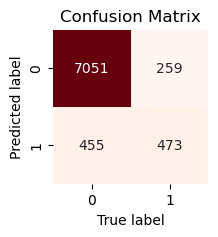

In [16]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('bank/tree_conf_mat.png')
plt.show()


In [17]:
# Evaluate the model performance
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9133284777858703
              precision    recall  f1-score   support

          no      0.939     0.965     0.952      7310
         yes      0.646     0.510     0.570       928

    accuracy                          0.913      8238
   macro avg      0.793     0.737     0.761      8238
weighted avg      0.906     0.913     0.909      8238



### Visualizing the Decision Tree

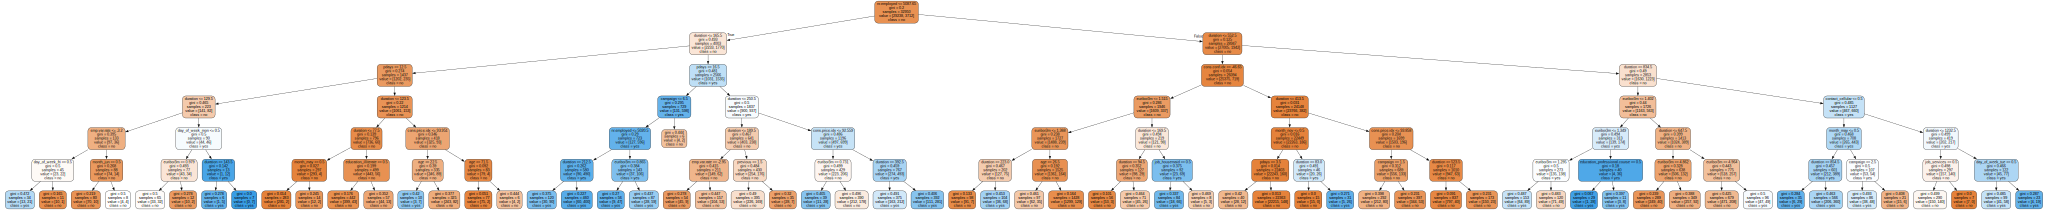

In [18]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os
import pydot

export_graphviz(
        bank_tree_clf.best_estimator_,
        feature_names=bank_data.iloc[:,:-1].columns,
        class_names=bank_tree_clf.best_estimator_.classes_,
        out_file=os.path.join("F:/Coursework/Data Mining and Machine Learning/Assignment 1", "bank_tree.dot"),
        rounded=True,
        filled=True
    )

(graph,) = pydot.graph_from_dot_file('bank_tree.dot')
graph.write_png('bank/bank_tree.png')


Source.from_file(os.path.join("F:/Coursework/Data Mining and Machine Learning/Assignment 1", "bank_tree.dot"))



## Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


bank_clf_nb = MultinomialNB(force_alpha=True)

start_time = time.time()
bank_clf_nb.fit(X_train, y_train)

print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

# Calculate memory usage
memory=(sys.getsizeof(X_train)+sys.getsizeof(y_train)+sys.getsizeof(y_test)+
        sys.getsizeof(y_train)+sys.getsizeof(bank_data)+sys.getsizeof(X)+sys.getsizeof(y))
print(f"Memory usage: {(memory/1024**2):.{2}f} MB")

# Predict on the test set
y_pred = bank_clf_nb.predict(X_test)

Training time: 0.08 seconds
Memory usage: 19.84 MB


## Model Performance

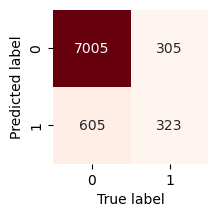

In [20]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.savefig('bank/nb_conf_mat.png')
plt.show()

In [21]:
from sklearn import metrics

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.8895362952172857
              precision    recall  f1-score   support

          no      0.920     0.958     0.939      7310
         yes      0.514     0.348     0.415       928

    accuracy                          0.890      8238
   macro avg      0.717     0.653     0.677      8238
weighted avg      0.875     0.890     0.880      8238



#

# Task 2

In [22]:
movies_data=pd.read_csv("movie/Data for repository.csv")

In [23]:
movies_data.head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000


In [24]:
#Add target variable (hit or flop)
movies_data['y']=movies_data['Revenue(INR)']> movies_data['Budget(INR)']
movies_data['y']=movies_data['y'].map({True: 'hit', False: 'flop'})

# Convert categorical variables into numerical using one-hot encoding
movies_data = pd.get_dummies(movies_data, columns=['Movie Name', 'Release Period', 'Whether Remake', 
                                                 'Whether Franchise', 'Genre', 'New Actor', 'New Director',
                                                 'New Music Director', 'Lead Star', 'Director', 'Music Director'])
# Split the data into features and target
X = movies_data.drop(['y'], axis=1)
y = movies_data['y']

In [25]:
#Value counts for each class
movies_data['y'].value_counts()

hit     1226
flop     472
Name: y, dtype: int64

## Decision Tree Model

In [26]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40,stratify=y)

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3, 4, 5,6]}

# Train the decision tree model with GridSearchCV
movie_tree_clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)

start_time = time.time()
clf = movie_tree_clf.fit(X_train, y_train)

print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

# Calculate memory usage
memory=(sys.getsizeof(X_train)+sys.getsizeof(y_train)+sys.getsizeof(y_test)+
        sys.getsizeof(y_train)+sys.getsizeof(bank_data)+sys.getsizeof(X)+sys.getsizeof(y))
print(f"Memory usage: {(memory/1024**2):.{2}f} MB")

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV: ", movie_tree_clf.best_params_)

# Predict on the test set
y_pred = movie_tree_clf.predict(X_test)

Training time: 124.84 seconds
Memory usage: 19.37 MB
Best parameters found by GridSearchCV:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


### Model Performance

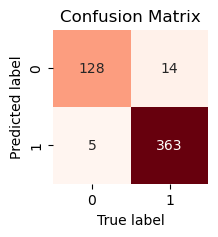

In [27]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.savefig('movie/tree_conf_mat.png')
plt.show()

In [28]:
# Evaluate the model performance

print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.9627450980392157
              precision    recall  f1-score   support

        flop      0.962     0.901     0.931       142
         hit      0.963     0.986     0.974       368

    accuracy                          0.963       510
   macro avg      0.963     0.944     0.953       510
weighted avg      0.963     0.963     0.962       510



### Visualizing the Decision Tree

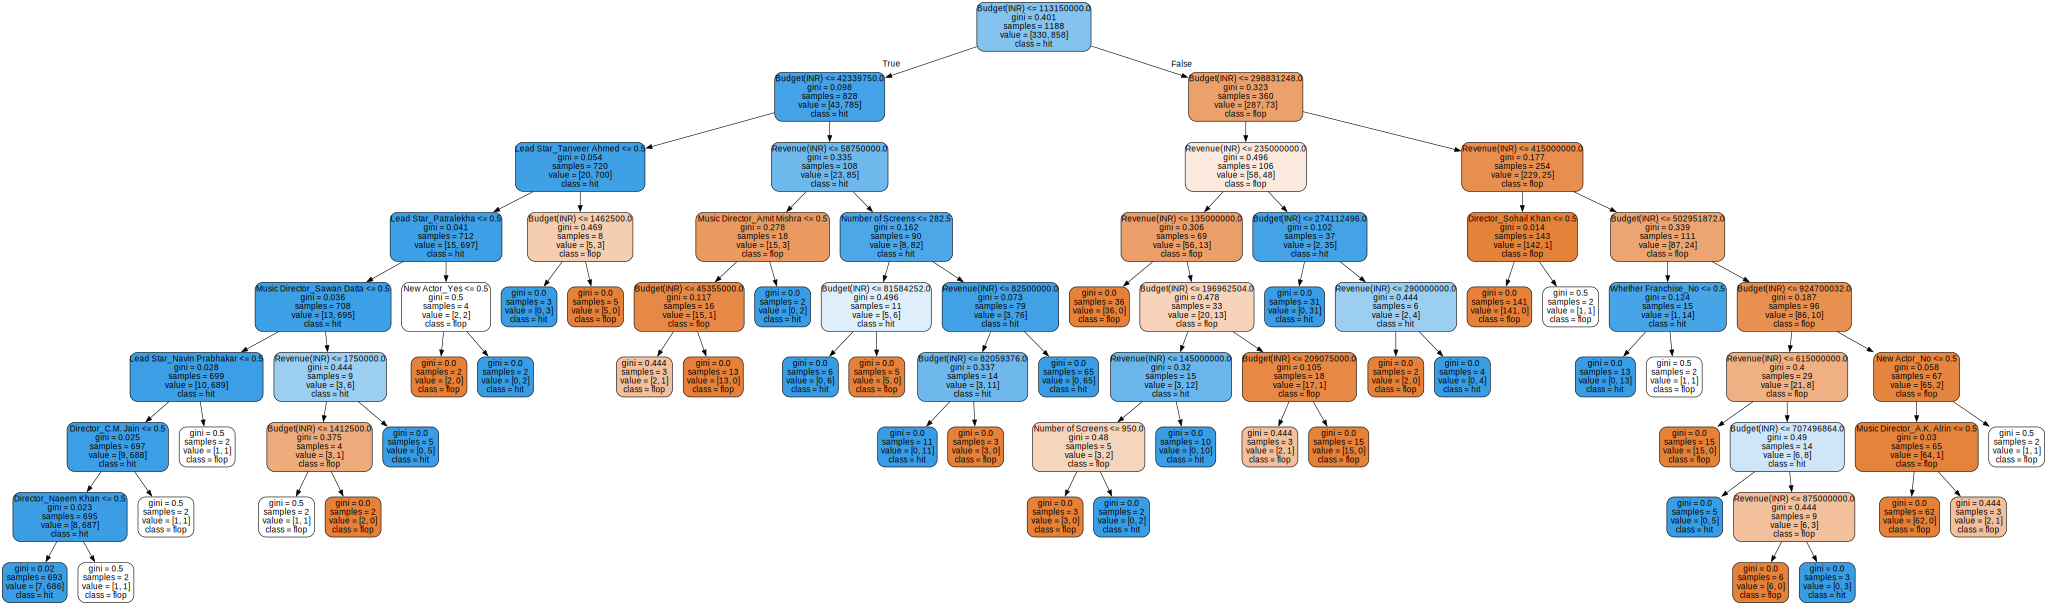

In [29]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os
import pydot 

export_graphviz(
        movie_tree_clf.best_estimator_,
        feature_names=movies_data.iloc[:,:-1].columns,
        class_names= movie_tree_clf.best_estimator_.classes_,
        out_file=os.path.join("F:/Coursework/Data Mining and Machine Learning/Assignment 1/movie", "movie_tree.dot"),
        rounded=True,
        filled=True
    )



(graph,) = pydot.graph_from_dot_file('movie_tree.dot')
graph.write_png('movie/movie_tree.png')

Source.from_file(os.path.join("F:/Coursework/Data Mining and Machine Learning/Assignment 1/movie", "movie_tree.dot"))


## Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40,stratify=y)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
movie_nb_clf = MultinomialNB(force_alpha=True)


start_time = time.time()
movie_nb_clf.fit(X_train, y_train)


print(f'Training time: {(time.time()-start_time):.{2}f} seconds')

# Calculate memory usage
memory=(sys.getsizeof(X_train)+sys.getsizeof(y_train)+sys.getsizeof(y_test)+
        sys.getsizeof(y_train)+sys.getsizeof(bank_data)+sys.getsizeof(X)+sys.getsizeof(y))
print(f"Memory usage: {(memory/1024**2):.{2}f} MB")




y_pred = movie_nb_clf.predict(X_test)

Training time: 0.03 seconds
Memory usage: 57.79 MB


### Model Performance

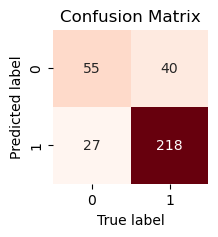

In [31]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.savefig('movie/nb_conf_mat.png')
plt.show()

In [32]:
print("Accuracy: ", accuracy_score(y_pred,y_test))


print("Accuracy: ", accuracy_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  0.8029411764705883
Accuracy:  0.8029411764705883
              precision    recall  f1-score   support

        flop      0.671     0.579     0.621        95
         hit      0.845     0.890     0.867       245

    accuracy                          0.803       340
   macro avg      0.758     0.734     0.744       340
weighted avg      0.796     0.803     0.798       340

